In [3]:
import scipy.io as sio
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

mat_content = sio.loadmat('stack.mat')
num_of_images = int(mat_content['numframes'])

# Define the functions from your provided code snippet
def calculate_ml(image):
    dxx = np.array([[0, 0, 0],
                    [1, -2, 1],
                    [0, 0, 0]])
    dyy = np.array([[0, 1, 0],
                    [0, -2, 0],
                    [0, 1, 0]])
    der_x = 0
    der_y = 0
    dim = image.shape[0]
    fxx = np.zeros((dim,dim))
    fyy = np.zeros((dim,dim))
    ML = np.zeros((dim,dim))
    for x in range(1 , dim + 1):
        for y in range(1 , dim + 1):
            der_x  = 0
            der_y = 0
            for i in range(3):
                for j in range(3):
                    if 0 <= x - 1 + i < image.shape[0] and 0 <= y - 1 + j < image.shape[1]:
                        der_x += dxx[i,j]*image[x-1+i , y-1+j]
                        der_y += dyy[i,j]*image[x-1+i , y-1+j]
            fxx[x-1 , y-1] = der_x
            fyy[x-1 , y-1] = der_y
            ML[x-1 , y-1] = np.sum((np.abs(fxx[[x-1 , y-1]]))+np.abs(fyy[[x-1 , y-1]]))
    return ML

def calculate_sml(image, q):
    ML = calculate_ml(image)
    dim = image.shape[0]
    SML = np.zeros((dim, dim))
    if q == 0:
        for x in range(dim):
            for y in range(dim):
                SML[x, y] = ML[x, y]
    else:
        for x in range(q, dim + q):
            for y in range(q, dim + q):
                for i in range(x - q, x + q + 1):
                    for j in range(y - q, y + q + 1):
                        if 0 <= i < image.shape[0] and 0 <= j < image.shape[1]:
                            SML[x - q, y - q] += ML[i, j]
    return SML

def pad(input_image, q ):
    padded_image = np.zeros((input_image.shape[0],input_image.shape[1]))
    if q == 0:
        padded_image = input_image
    else:
        p = (((2*q)+1) - 1)/2
        padded_image = np.pad(input_image,(int(p),int(p)))
    return padded_image

# Main code
# q = 1

# if (q == 0):
#     stacked = np.zeros((115,115,101))
# elif (q==1):
#    stacked = np.zeros((117,117,101))
# else:
#    stacked = np.zeros((119,119,101))

# frames = {}

# for i in range(1,num_of_images+1):
#     frame_number = i
#     frame_key = "frame{:03d}".format(frame_number)
#     frames[frame_number] = mat_content[frame_key]

#     image = pad(mat_content[frame_key], 1)
#     stacked[:, :, i - 1] = calculate_sml(image, 1)
#     print(f'sml of {i} th frame calculated')

# print("stack created")

# h, w = frames[1].shape
# d = 50.50
# fig = plt.figure(figsize=(15,10))
# axes = []

# max_sharp_frames = np.argmax(stacked, axis=2)
# depth = max_sharp_frames * d

# sharp_img = np.zeros((h, w))
# for i in range(h):
#     for j in range(w):
#         frame = max_sharp_frames[i, j] + 1
#         sharp_img[i, j] = frames[frame][i, j]

# Now you can use sharp_img for visualization or further processing



SML of 1th frame calculated for q=0
SML of 2th frame calculated for q=0
SML of 3th frame calculated for q=0
SML of 4th frame calculated for q=0
SML of 5th frame calculated for q=0
SML of 6th frame calculated for q=0
SML of 7th frame calculated for q=0
SML of 8th frame calculated for q=0
SML of 9th frame calculated for q=0
SML of 10th frame calculated for q=0
SML of 11th frame calculated for q=0
SML of 12th frame calculated for q=0
SML of 13th frame calculated for q=0
SML of 14th frame calculated for q=0
SML of 15th frame calculated for q=0
SML of 16th frame calculated for q=0
SML of 17th frame calculated for q=0
SML of 18th frame calculated for q=0
SML of 19th frame calculated for q=0
SML of 20th frame calculated for q=0
SML of 21th frame calculated for q=0
SML of 22th frame calculated for q=0
SML of 23th frame calculated for q=0
SML of 24th frame calculated for q=0
SML of 25th frame calculated for q=0
SML of 26th frame calculated for q=0
SML of 27th frame calculated for q=0
SML of 28t

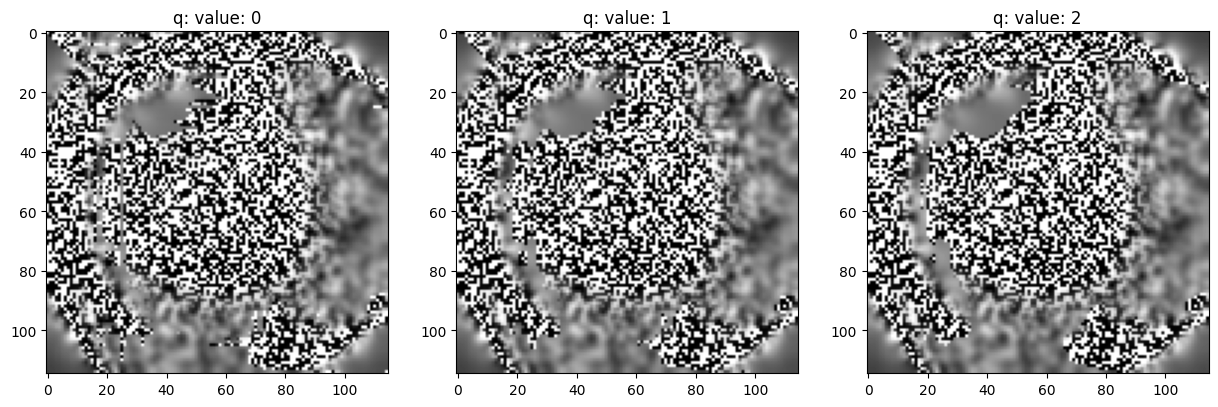

In [14]:
q_values = [0, 1, 2]
fig = plt.figure(figsize=(15, 10))
axes = []
depths = {}
for l, q in enumerate(q_values):
    if q == 0:
        stacked = np.zeros((115, 115, num_of_images))
    elif q == 1:
        stacked = np.zeros((117, 117, num_of_images))
    else:
        stacked = np.zeros((119, 119, num_of_images))

    for i in range(1, num_of_images + 1):
        frame_key = "frame{:03d}".format(i)
        image = pad(mat_content[frame_key], q)
        stacked[:, :, i - 1] = calculate_sml(image, q)
        print(f'SML of {i}th frame calculated for q={q}')

    h, w = mat_content[frame_key].shape
    max_sharp_frames = np.argmax(stacked, axis=2)
    depth = max_sharp_frames * 50.50
    depths[l] = depth
    sharp_img = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            frame = max_sharp_frames[i, j] + 1
            sharp_img[i, j] = mat_content["frame{:03d}".format(frame)][i, j]

    axes.append(fig.add_subplot(1, 3, l + 1))
    subplot_title = ("q: value: " + str(q))
    axes[-1].set_title(subplot_title)
    plt.imshow(sharp_img, 'gray')

plt.show()

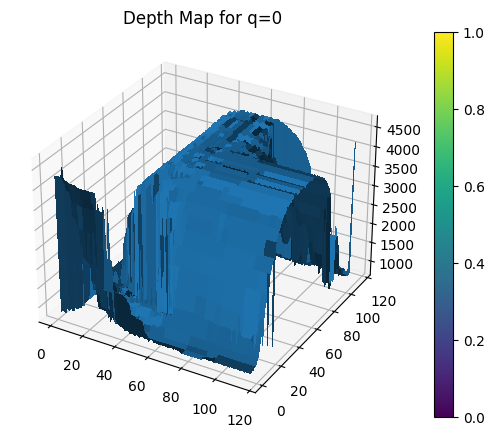

In [8]:
x, y = frames[1].shape
X, Y = np.meshgrid(np.arange(x)+1, np.arange(y)+1)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, depths[0], linewidth=0, antialiased=False)
title = rf"Depth Map for q=0"
plt.title(title)
fig.colorbar(surf)
plt.show()


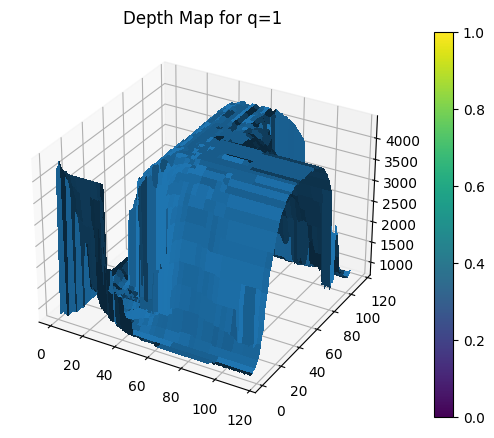

In [10]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Adjust the size of depths[1] to match X and Y
depths_q1 = depths[1][:x, :y]

surf = ax.plot_surface(X, Y, depths_q1, linewidth=0, antialiased=False)
title = rf"Depth Map for q=1"
plt.title(title)
fig.colorbar(surf)
plt.show()


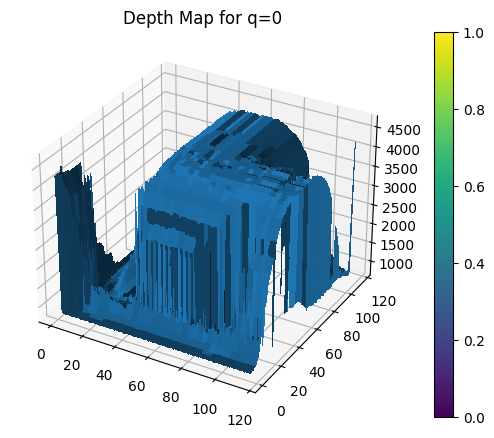

In [11]:
x, y = mat_content["frame001"].shape
X, Y = np.meshgrid(np.arange(y)+1, np.arange(x)+1)  # Note the order of arange(y) and arange(x)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, depths[0].T, linewidth=0, antialiased=False)  # Transpose depths[0]
title = rf"Depth Map for q=0"
plt.title(title)
fig.colorbar(surf)
plt.show()


SML of 1th frame calculated for q=0
SML of 2th frame calculated for q=0
SML of 3th frame calculated for q=0
SML of 4th frame calculated for q=0
SML of 5th frame calculated for q=0
SML of 6th frame calculated for q=0
SML of 7th frame calculated for q=0
SML of 8th frame calculated for q=0
SML of 9th frame calculated for q=0
SML of 10th frame calculated for q=0
SML of 11th frame calculated for q=0
SML of 12th frame calculated for q=0
SML of 13th frame calculated for q=0
SML of 14th frame calculated for q=0
SML of 15th frame calculated for q=0
SML of 16th frame calculated for q=0
SML of 17th frame calculated for q=0
SML of 18th frame calculated for q=0
SML of 19th frame calculated for q=0
SML of 20th frame calculated for q=0
SML of 21th frame calculated for q=0
SML of 22th frame calculated for q=0
SML of 23th frame calculated for q=0
SML of 24th frame calculated for q=0
SML of 25th frame calculated for q=0
SML of 26th frame calculated for q=0
SML of 27th frame calculated for q=0
SML of 28t

ValueError: could not broadcast input array from shape (115,115) into shape (117,117)

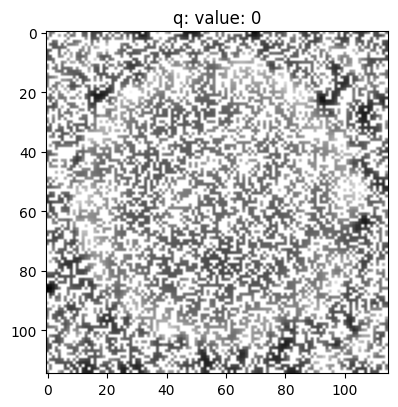

In [17]:
import scipy.io as sio
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

mat_content = sio.loadmat('stack.mat')
num_of_images = int(mat_content['numframes'])

# Define the functions for convolution
def conv(img, kernel):
    width, height = img.shape
    k_size = len(kernel)
    t = k_size // 2 
    filtered_image = np.zeros((width - 2 * t, height - 2 * t))
    for i in range(t, width - t):
        for j in range(t, height - t):
            # Extract image patch
            patch = img[i - t:i + t + 1, j - t:j + t + 1]
            # Multiply image patch with the kernel, sum, and store
            filtered_image[i - t, j - t] = np.sum(patch * kernel)
    return filtered_image

# Define the functions for calculating sharpness
def calculate_ml(image):
    dxx = np.array([[0, 0, 0],
                    [1, -2, 1],
                    [0, 0, 0]])
    dyy = np.array([[0, 1, 0],
                    [0, -2, 0],
                    [0, 1, 0]])
    der_x = 0
    der_y = 0
    dim = image.shape[0]
    fxx = np.zeros((dim,dim))
    fyy = np.zeros((dim,dim))
    ML = np.zeros((dim,dim))
    for x in range(1 , dim + 1):
        for y in range(1 , dim + 1):
            der_x  = 0
            der_y = 0
            for i in range(3):
                for j in range(3):
                    if 0 <= x - 1 + i < image.shape[0] and 0 <= y - 1 + j < image.shape[1]:
                        der_x += dxx[i,j]*image[x-1+i , y-1+j]
                        der_y += dyy[i,j]*image[x-1+i , y-1+j]
            fxx[x-1 , y-1] = der_x
            fyy[x-1 , y-1] = der_y
            ML[x-1 , y-1] = np.sum((np.abs(fxx[[x-1 , y-1]]))+np.abs(fyy[[x-1 , y-1]]))
    return ML

def calculate_sml(image, q):
    ML = calculate_ml(image)
    dim = image.shape[0]
    SML = np.zeros((dim, dim))
    if q == 0:
        for x in range(dim):
            for y in range(dim):
                SML[x, y] = ML[x, y]
    else:
        for x in range(q, dim + q):
            for y in range(q, dim + q):
                for i in range(x - q, x + q + 1):
                    for j in range(y - q, y + q + 1):
                        if 0 <= i < image.shape[0] and 0 <= j < image.shape[1]:
                            SML[x - q, y - q] += ML[i, j]
    return SML

def pad(input_image, q ):
    padded_image = np.zeros((input_image.shape[0],input_image.shape[1]))
    if q == 0:
        padded_image = input_image
    else:
        p = (((2*q)+1) - 1)/2
        padded_image = np.pad(input_image,(int(p),int(p)))
    return padded_image

# Main code
q_values = [0, 1, 2]
fig = plt.figure(figsize=(15, 10))
axes = []
depths = {}
for l, q in enumerate(q_values):
    if q == 0:
        stacked = np.zeros((115, 115, num_of_images))
    elif q == 1:
        stacked = np.zeros((117, 117, num_of_images))
    else:
        stacked = np.zeros((119, 119, num_of_images))

    for i in range(1, num_of_images + 1):
        frame_key = "frame{:03d}".format(i)
        image = pad(mat_content[frame_key], q)
        stacked[:, :, i - 1] = conv(image, np.ones((2*q+1, 2*q+1)))
        print(f'SML of {i}th frame calculated for q={q}')

    h, w = mat_content[frame_key].shape
    max_sharp_frames = np.argmax(stacked, axis=2)
    depth = max_sharp_frames * 50.50
    depths[l] = depth
    sharp_img = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            frame = max_sharp_frames[i, j] + 1
            sharp_img[i, j] = mat_content["frame{:03d}".format(frame)][i, j]

    axes.append(fig.add_subplot(1, 3, l + 1))
    subplot_title = ("q: value: " + str(q))
    axes[-1].set_title(subplot_title)
    plt.imshow(sharp_img, 'gray')

plt.show()


SML of 1th frame calculated for q=0
SML of 2th frame calculated for q=0
SML of 3th frame calculated for q=0
SML of 4th frame calculated for q=0
SML of 5th frame calculated for q=0
SML of 6th frame calculated for q=0
SML of 7th frame calculated for q=0
SML of 8th frame calculated for q=0
SML of 9th frame calculated for q=0
SML of 10th frame calculated for q=0
SML of 11th frame calculated for q=0
SML of 12th frame calculated for q=0
SML of 13th frame calculated for q=0
SML of 14th frame calculated for q=0
SML of 15th frame calculated for q=0
SML of 16th frame calculated for q=0
SML of 17th frame calculated for q=0
SML of 18th frame calculated for q=0
SML of 19th frame calculated for q=0
SML of 20th frame calculated for q=0
SML of 21th frame calculated for q=0
SML of 22th frame calculated for q=0
SML of 23th frame calculated for q=0
SML of 24th frame calculated for q=0
SML of 25th frame calculated for q=0
SML of 26th frame calculated for q=0
SML of 27th frame calculated for q=0
SML of 28t

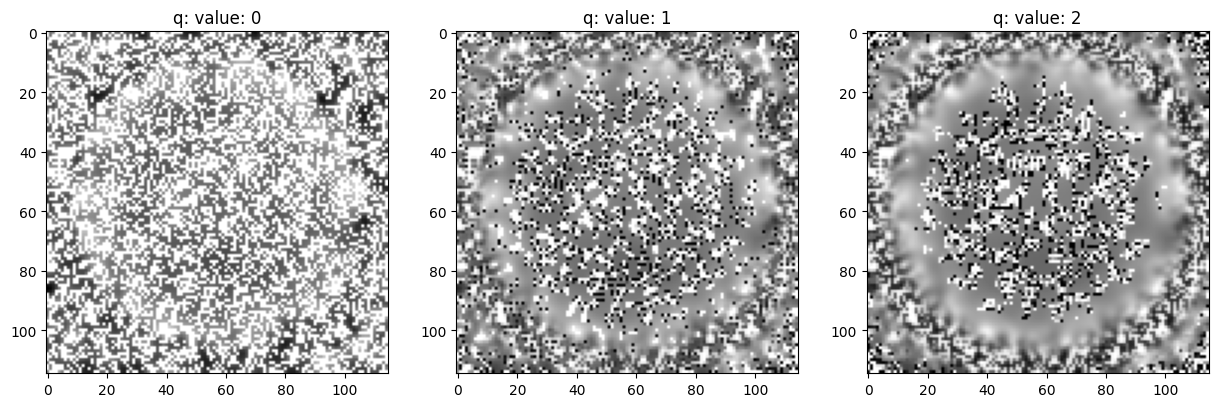

In [18]:
import scipy.io as sio
import numpy as np
from matplotlib import pyplot as plt

mat_content = sio.loadmat('stack.mat')
num_of_images = int(mat_content['numframes'])

# Define the functions for convolution
def conv(img, kernel):
    width, height = img.shape
    k_size = len(kernel)
    t = k_size // 2 
    filtered_image = np.zeros((width - 2 * t, height - 2 * t))
    for i in range(t, width - t):
        for j in range(t, height - t):
            # Extract image patch
            patch = img[i - t:i + t + 1, j - t:j + t + 1]
            # Multiply image patch with the kernel, sum, and store
            filtered_image[i - t, j - t] = np.sum(patch * kernel)
    return filtered_image

# Define the functions for calculating sharpness
def calculate_ml(image):
    dxx = np.array([[0, 0, 0],
                    [1, -2, 1],
                    [0, 0, 0]])
    dyy = np.array([[0, 1, 0],
                    [0, -2, 0],
                    [0, 1, 0]])
    der_x = 0
    der_y = 0
    dim = image.shape[0]
    fxx = np.zeros((dim,dim))
    fyy = np.zeros((dim,dim))
    ML = np.zeros((dim,dim))
    for x in range(1 , dim + 1):
        for y in range(1 , dim + 1):
            der_x  = 0
            der_y = 0
            for i in range(3):
                for j in range(3):
                    if 0 <= x - 1 + i < image.shape[0] and 0 <= y - 1 + j < image.shape[1]:
                        der_x += dxx[i,j]*image[x-1+i , y-1+j]
                        der_y += dyy[i,j]*image[x-1+i , y-1+j]
            fxx[x-1 , y-1] = der_x
            fyy[x-1 , y-1] = der_y
            ML[x-1 , y-1] = np.sum((np.abs(fxx[[x-1 , y-1]]))+np.abs(fyy[[x-1 , y-1]]))
    return ML

def calculate_sml(image, q):
    ML = calculate_ml(image)
    dim = image.shape[0]
    SML = np.zeros((dim, dim))
    if q == 0:
        for x in range(dim):
            for y in range(dim):
                SML[x, y] = ML[x, y]
    else:
        for x in range(q, dim + q):
            for y in range(q, dim + q):
                for i in range(x - q, x + q + 1):
                    for j in range(y - q, y + q + 1):
                        if 0 <= i < image.shape[0] and 0 <= j < image.shape[1]:
                            SML[x - q, y - q] += ML[i, j]
    return SML

def pad(input_image, q ):
    padded_image = np.zeros((input_image.shape[0],input_image.shape[1]))
    if q == 0:
        padded_image = input_image
    else:
        p = (((2*q)+1) - 1)/2
        padded_image = np.pad(input_image,(int(p),int(p)))
    return padded_image

# Main code
q_values = [0, 1, 2]
fig = plt.figure(figsize=(15, 10))
axes = []
depths = {}
for l, q in enumerate(q_values):
    if q == 0:
        stacked = np.zeros((115, 115, num_of_images))
    elif q == 1:
        stacked = np.zeros((117, 117, num_of_images))
    else:
        stacked = np.zeros((119, 119, num_of_images))

    for i in range(1, num_of_images + 1):
        frame_key = "frame{:03d}".format(i)
        image = pad(mat_content[frame_key], q)
        conv_result = conv(image, np.ones((2*q+1, 2*q+1)))
        stacked[:conv_result.shape[0], :conv_result.shape[1], i - 1] = conv_result
        print(f'SML of {i}th frame calculated for q={q}')

    h, w = mat_content[frame_key].shape
    max_sharp_frames = np.argmax(stacked, axis=2)
    depth = max_sharp_frames * 50.50
    depths[l] = depth
    sharp_img = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            frame = max_sharp_frames[i, j] + 1
            sharp_img[i, j] = mat_content["frame{:03d}".format(frame)][i, j]

    axes.append(fig.add_subplot(1, 3, l + 1))
    subplot_title = ("q: value: " + str(q))
    axes[-1].set_title(subplot_title)
    plt.imshow(sharp_img, 'gray')

plt.show()


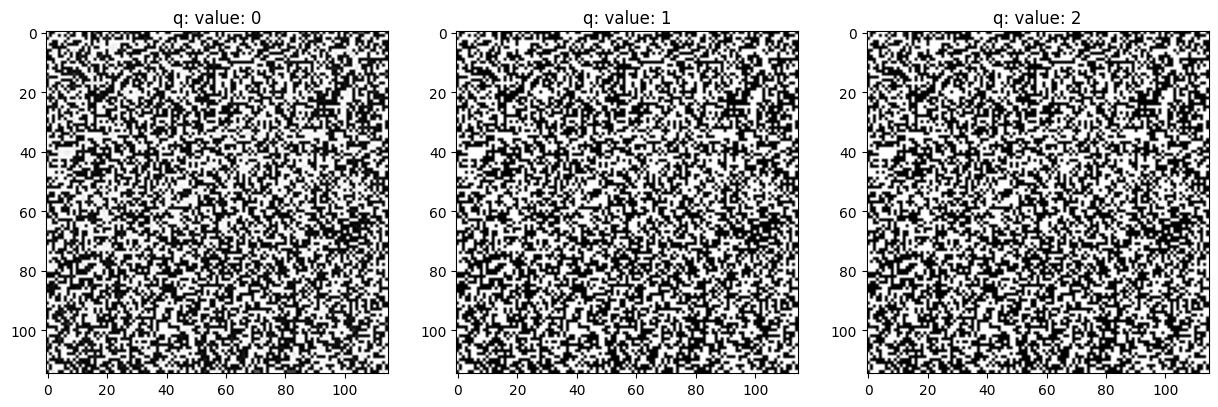

TypeError: gca() got an unexpected keyword argument 'projection'

<Figure size 1000x500 with 0 Axes>

In [2]:
import numpy as np
import cv2
from scipy.io import loadmat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load stack.mat file
mat1 = loadmat('stack.mat')
N = int(mat1['numframes']) 
frames = {}

# Store the images in a dictionary for easier access later
for key in mat1.keys():
    if key[:5] == 'frame':
        frames[int(key[5:])] = mat1[key]

d = 50.50
q_values = [0, 1, 2]
lx = np.array([[0,  0, 0],[1, -2, 1],[0,  0, 0]])
ly = np.array([[0,  1, 0],[0, -2, 0],[0,  1, 0]])

def conv(img, kernel):
    width, height = img.shape
    k_size = len(kernel)
    t = k_size // 2 
    filtered_image = np.zeros((width - 2 * t, height - 2 * t))
    for i in range(t, width - t):
        for j in range(t, height - t):
            patch = img[i - t:i + t + 1, j - t:j + t + 1]
            filtered_image[i - t, j - t] = np.sum(patch * kernel)
    return filtered_image

fig = plt.figure(figsize=(15, 10))
axes = []
depths = {}
Maxs = {}
qs = {}

for l, q in enumerate(q_values):
    width, height = frames[1].shape
    stacked = np.zeros((width, height, N))

    for i in range(N):
        img = frames[i + 1]
        k = 2 * q + 1
        kernel = np.ones((k, k))
        p = q + 1
        img_padded = np.zeros((width + 2 * p, height + 2 * p))
        img_padded[p:-p, p:-p] = img

        I_xx = conv(img_padded, lx)
        I_yy = conv(img_padded, ly)
        ML = np.abs(I_xx) + np.abs(I_yy)
        SML = conv(ML, kernel)
        stacked[:, :, i] = SML

    max_sharpness_frames = np.argmax(stacked, axis=2)

    depth = max_sharpness_frames * d
    depths[l] = depth
    Maxs[l] = max_sharpness_frames
    sharp_img = np.zeros((width, height))

    for i in range(width):
        for j in range(height):
            frame = max_sharpness_frames[i, j] + 1
            sharp_img[i, j] = frames[frame][i, j]

    qs[l] = sharp_img
    axes.append(fig.add_subplot(1, 3, l + 1))
    subplot_title = ("q: value: " + str(q))
    axes[-1].set_title(subplot_title)
    plt.imshow(sharp_img, 'gray')

plt.show()

# Plot depth maps
for l, q in enumerate(q_values):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, depths[l], linewidth=0, antialiased=False)
    title = rf"Depth Map for q={q}"
    plt.title(title)
    fig.colorbar(surf)
    plt.show()

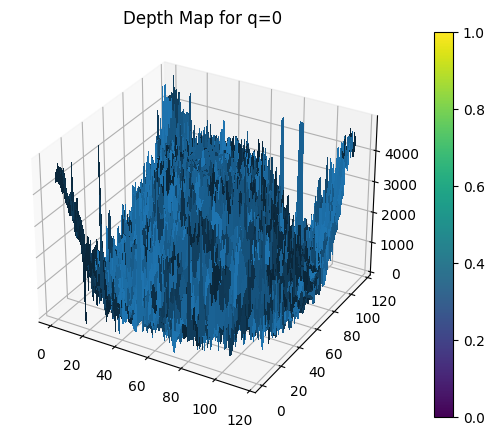

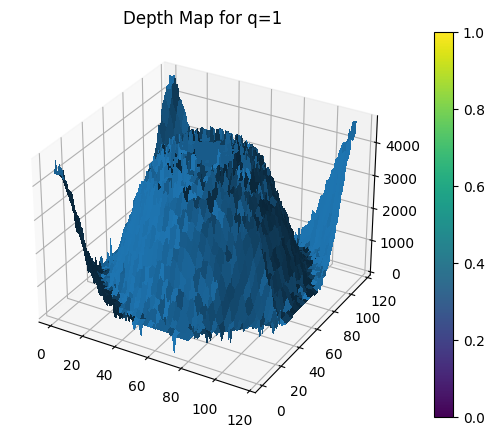

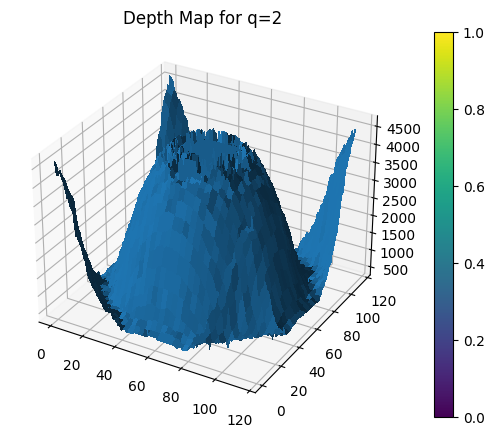

In [4]:
# Plot depth maps
for l, q in enumerate(q_values):
    width, height = frames[1].shape
    X, Y = np.meshgrid(np.arange(height) + 1, np.arange(width) + 1)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, depths[l], linewidth=0, antialiased=False)
    title = rf"Depth Map for q={q}"
    plt.title(title)
    fig.colorbar(surf)
    plt.show()


In [6]:
import numpy as np
import cv2
from scipy.io import loadmat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load stack.mat file
mat_content = loadmat('stack.mat')
num_of_images = int(mat_content['numframes'])
frames = {}

# Store the images in a dictionary for easier access later
for key in mat_content.keys():
    if key.startswith('frame'):
        frames[int(key[5:])] = mat_content[key]

d = 50.50
q_values = [0, 1, 2]
lx = np.array([[0, 0, 0], [1, -2, 1], [0, 0, 0]])
ly = np.array([[0, 1, 0], [0, -2, 0], [0, 1, 0]])

def convolve(img, kernel):
    width, height = img.shape
    k_size = len(kernel)
    t = k_size // 2 
    filtered_image = np.zeros((width - 2 * t, height - 2 * t))
    for i in range(t, width - t):
        for j in range(t, height - t):
            patch = img[i - t:i + t + 1, j - t:j + t + 1]
            filtered_image[i - t, j - t] = np.sum(patch * kernel)
    return filtered_image

# Calculate Sharpness Metric (ML)
def calculate_ml(image):
    dim = image.shape[0]
    ML = np.zeros((dim, dim))
    for x in range(1, dim + 1):
        for y in range(1, dim + 1):
            der_x = np.sum(lx * image[x - 1:x + 2, y - 1:y + 2])
            der_y = np.sum(ly * image[x - 1:x + 2, y - 1:y + 2])
            ML[x - 1, y - 1] = np.sum(np.abs(der_x) + np.abs(der_y))
    return ML

# Calculate Sharpness Metric with Sliding Window (SML)
def calculate_sml(image, q):
    ML = calculate_ml(image)
    dim = image.shape[0]
    SML = np.zeros((dim, dim))
    for x in range(q, dim + q):
        for y in range(q, dim + q):
            for i in range(x - q, x + q + 1):
                for j in range(y - q, y + q + 1):
                    if 0 <= i < dim and 0 <= j < dim:
                        SML[x - q, y - q] += ML[i, j]
    return SML

def pad_image(input_image, q):
    if q == 0:
        return input_image
    else:
        pad_size = ((2 * q) + 1 - 1) // 2
        return np.pad(input_image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')

# Main code
fig = plt.figure(figsize=(15, 10))
for l, q in enumerate(q_values):
    if q == 0:
        stacked = np.zeros((115, 115, num_of_images))
    elif q == 1:
        stacked = np.zeros((117, 117, num_of_images))
    else:
        stacked = np.zeros((119, 119, num_of_images))

    for i in range(1, num_of_images + 1):
        frame_key = f"frame{i:03d}"
        if frame_key in frames:  # Check if frame_key exists in frames dictionary
            image = pad_image(frames[i], q)
            conv_result = convolve(image, np.ones((2 * q + 1, 2 * q + 1)))
            stacked[:conv_result.shape[0], :conv_result.shape[1], i - 1] = conv_result
            print(f'SML of {i}th frame calculated for q={q}')
        else:
            print(f'Frame {frame_key} not found.')

    h, w = frames[frame_key].shape
    max_sharp_frames = np.argmax(stacked, axis=2)
    depth = max_sharp_frames * d

    axes = fig.add_subplot(1, 3, l + 1)
    subplot_title = f"q: value: {q}"
    axes.set_title(subplot_title)
    plt.imshow(frames[max_sharp_frames[0] + 1], 'gray')

plt.show()


Frame frame001 not found.
Frame frame002 not found.
Frame frame003 not found.
Frame frame004 not found.
Frame frame005 not found.
Frame frame006 not found.
Frame frame007 not found.
Frame frame008 not found.
Frame frame009 not found.
Frame frame010 not found.
Frame frame011 not found.
Frame frame012 not found.
Frame frame013 not found.
Frame frame014 not found.
Frame frame015 not found.
Frame frame016 not found.
Frame frame017 not found.
Frame frame018 not found.
Frame frame019 not found.
Frame frame020 not found.
Frame frame021 not found.
Frame frame022 not found.
Frame frame023 not found.
Frame frame024 not found.
Frame frame025 not found.
Frame frame026 not found.
Frame frame027 not found.
Frame frame028 not found.
Frame frame029 not found.
Frame frame030 not found.
Frame frame031 not found.
Frame frame032 not found.
Frame frame033 not found.
Frame frame034 not found.
Frame frame035 not found.
Frame frame036 not found.
Frame frame037 not found.
Frame frame038 not found.
Frame frame0

KeyError: 'frame100'

<Figure size 1500x1000 with 0 Axes>

SML of 1th frame calculated for q=0
SML of 2th frame calculated for q=0
SML of 3th frame calculated for q=0
SML of 4th frame calculated for q=0
SML of 5th frame calculated for q=0
SML of 6th frame calculated for q=0
SML of 7th frame calculated for q=0
SML of 8th frame calculated for q=0
SML of 9th frame calculated for q=0
SML of 10th frame calculated for q=0
SML of 11th frame calculated for q=0
SML of 12th frame calculated for q=0
SML of 13th frame calculated for q=0
SML of 14th frame calculated for q=0
SML of 15th frame calculated for q=0
SML of 16th frame calculated for q=0
SML of 17th frame calculated for q=0
SML of 18th frame calculated for q=0
SML of 19th frame calculated for q=0
SML of 20th frame calculated for q=0
SML of 21th frame calculated for q=0
SML of 22th frame calculated for q=0
SML of 23th frame calculated for q=0
SML of 24th frame calculated for q=0
SML of 25th frame calculated for q=0
SML of 26th frame calculated for q=0
SML of 27th frame calculated for q=0
SML of 28t

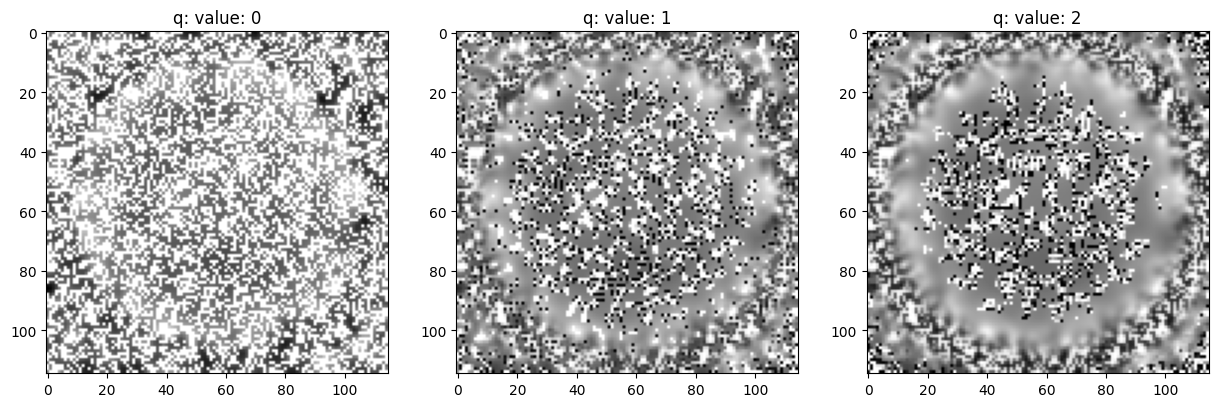

In [7]:
import scipy.io as sio
import numpy as np
from matplotlib import pyplot as plt

# Load stack.mat file
mat_content = sio.loadmat('stack.mat')
num_of_images = int(mat_content['numframes'])

# Define the convolution function
def conv2d(image, kernel):
    width, height = image.shape
    kernel_size = len(kernel)
    t = kernel_size // 2 
    filtered_image = np.zeros((width - 2 * t, height - 2 * t))
    for i in range(t, width - t):
        for j in range(t, height - t):
            patch = image[i - t:i + t + 1, j - t:j + t + 1]
            filtered_image[i - t, j - t] = np.sum(patch * kernel)
    return filtered_image

# Calculate the Measure of Sharpness (ML)
def calculate_ml(image):
    dxx = np.array([[0, 0, 0],
                    [1, -2, 1],
                    [0, 0, 0]])
    dyy = np.array([[0, 1, 0],
                    [0, -2, 0],
                    [0, 1, 0]])
    der_x = 0
    der_y = 0
    dim = image.shape[0]
    fxx = np.zeros((dim, dim))
    fyy = np.zeros((dim, dim))
    ML = np.zeros((dim, dim))
    for x in range(1, dim + 1):
        for y in range(1, dim + 1):
            der_x = 0
            der_y = 0
            for i in range(3):
                for j in range(3):
                    if 0 <= x - 1 + i < image.shape[0] and 0 <= y - 1 + j < image.shape[1]:
                        der_x += dxx[i, j] * image[x - 1 + i, y - 1 + j]
                        der_y += dyy[i, j] * image[x - 1 + i, y - 1 + j]
            fxx[x - 1, y - 1] = der_x
            fyy[x - 1, y - 1] = der_y
            ML[x - 1, y - 1] = np.sum((np.abs(fxx[[x - 1, y - 1]])) + np.abs(fyy[[x - 1, y - 1]]))
    return ML

# Calculate the Sum of Measures of Sharpness (SML)
def calculate_sml(image, q):
    ML = calculate_ml(image)
    dim = image.shape[0]
    SML = np.zeros((dim, dim))
    if q == 0:
        for x in range(dim):
            for y in range(dim):
                SML[x, y] = ML[x, y]
    else:
        for x in range(q, dim + q):
            for y in range(q, dim + q):
                for i in range(x - q, x + q + 1):
                    for j in range(y - q, y + q + 1):
                        if 0 <= i < image.shape[0] and 0 <= j < image.shape[1]:
                            SML[x - q, y - q] += ML[i, j]
    return SML

# Pad the input image
def pad(image, q):
    padded_image = np.zeros((image.shape[0], image.shape[1]))
    if q == 0:
        padded_image = image
    else:
        p = (((2 * q) + 1) - 1) / 2
        padded_image = np.pad(image, (int(p), int(p)))
    return padded_image

# Main code
q_values = [0, 1, 2]
fig = plt.figure(figsize=(15, 10))
axes = []
depths = {}

for l, q in enumerate(q_values):
    if q == 0:
        stacked = np.zeros((115, 115, num_of_images))
    elif q == 1:
        stacked = np.zeros((117, 117, num_of_images))
    else:
        stacked = np.zeros((119, 119, num_of_images))

    for i in range(1, num_of_images + 1):
        frame_key = "frame{:03d}".format(i)
        image = pad(mat_content[frame_key], q)
        conv_result = conv2d(image, np.ones((2 * q + 1, 2 * q + 1)))
        stacked[:conv_result.shape[0], :conv_result.shape[1], i - 1] = conv_result
        print(f'SML of {i}th frame calculated for q={q}')

    h, w = mat_content[frame_key].shape
    max_sharp_frames = np.argmax(stacked, axis=2)
    depth = max_sharp_frames * 50.50
    depths[l] = depth
    sharp_img = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            frame = max_sharp_frames[i, j] + 1
            sharp_img[i, j] = mat_content["frame{:03d}".format(frame)][i, j]

    axes.append(fig.add_subplot(1, 3, l + 1))
    subplot_title = ("q: value: " + str(q))
    axes[-1].set_title(subplot_title)
    plt.imshow(sharp_img, 'gray')

plt.show()


SML of 1th frame calculated for q=0
SML of 2th frame calculated for q=0
SML of 3th frame calculated for q=0
SML of 4th frame calculated for q=0
SML of 5th frame calculated for q=0
SML of 6th frame calculated for q=0
SML of 7th frame calculated for q=0
SML of 8th frame calculated for q=0
SML of 9th frame calculated for q=0
SML of 10th frame calculated for q=0
SML of 11th frame calculated for q=0
SML of 12th frame calculated for q=0
SML of 13th frame calculated for q=0
SML of 14th frame calculated for q=0
SML of 15th frame calculated for q=0
SML of 16th frame calculated for q=0
SML of 17th frame calculated for q=0
SML of 18th frame calculated for q=0
SML of 19th frame calculated for q=0
SML of 20th frame calculated for q=0
SML of 21th frame calculated for q=0
SML of 22th frame calculated for q=0
SML of 23th frame calculated for q=0
SML of 24th frame calculated for q=0
SML of 25th frame calculated for q=0
SML of 26th frame calculated for q=0
SML of 27th frame calculated for q=0
SML of 28t

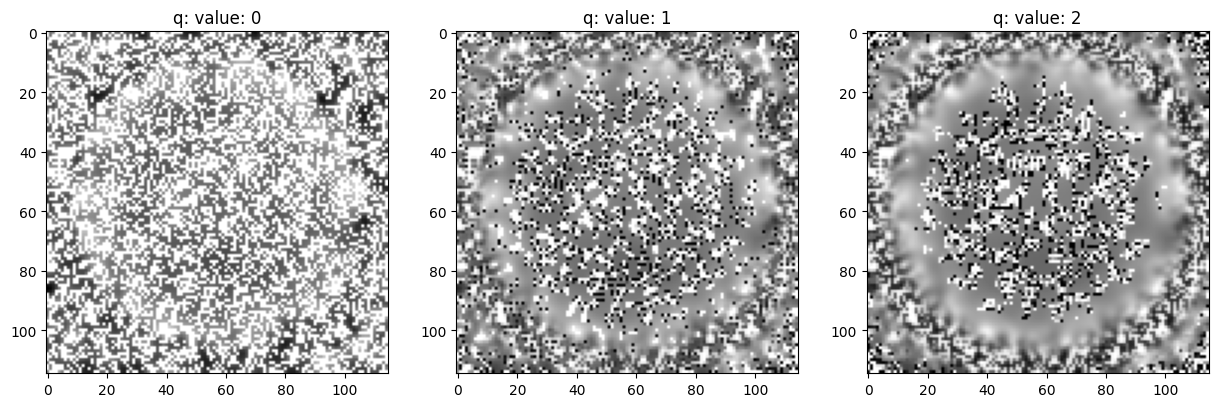

In [8]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Load the 'stack.mat' file
mat_content = sio.loadmat('stack.mat')
num_of_images = int(mat_content['numframes'])

# Define the convolution function
def conv2d(image, kernel):
    width, height = image.shape
    kernel_size = len(kernel)
    t = kernel_size // 2 
    filtered_image = np.zeros((width - 2 * t, height - 2 * t))
    for i in range(t, width - t):
        for j in range(t, height - t):
            patch = image[i - t:i + t + 1, j - t:j + t + 1]
            filtered_image[i - t, j - t] = np.sum(patch * kernel)
    return filtered_image

# Define the functions for calculating sharpness
def calculate_ml(image):
    dxx = np.array([[0, 0, 0],
                    [1, -2, 1],
                    [0, 0, 0]])
    dyy = np.array([[0, 1, 0],
                    [0, -2, 0],
                    [0, 1, 0]])
    der_x = 0
    der_y = 0
    dim = image.shape[0]
    fxx = np.zeros((dim, dim))
    fyy = np.zeros((dim, dim))
    ML = np.zeros((dim, dim))
    for x in range(1, dim + 1):
        for y in range(1, dim + 1):
            der_x = 0
            der_y = 0
            for i in range(3):
                for j in range(3):
                    if 0 <= x - 1 + i < image.shape[0] and 0 <= y - 1 + j < image.shape[1]:
                        der_x += dxx[i, j] * image[x - 1 + i, y - 1 + j]
                        der_y += dyy[i, j] * image[x - 1 + i, y - 1 + j]
            fxx[x - 1, y - 1] = der_x
            fyy[x - 1, y - 1] = der_y
            ML[x - 1, y - 1] = np.sum((np.abs(fxx[[x - 1, y - 1]])) + np.abs(fyy[[x - 1, y - 1]]))
    return ML

def calculate_sml(image, q):
    ML = calculate_ml(image)
    dim = image.shape[0]
    SML = np.zeros((dim, dim))
    if q == 0:
        for x in range(dim):
            for y in range(dim):
                SML[x, y] = ML[x, y]
    else:
        for x in range(q, dim + q):
            for y in range(q, dim + q):
                for i in range(x - q, x + q + 1):
                    for j in range(y - q, y + q + 1):
                        if 0 <= i < image.shape[0] and 0 <= j < image.shape[1]:
                            SML[x - q, y - q] += ML[i, j]
    return SML

def pad(input_image, q):
    padded_image = np.zeros((input_image.shape[0], input_image.shape[1]))
    if q == 0:
        padded_image = input_image
    else:
        p = (((2 * q) + 1) - 1) / 2
        padded_image = np.pad(input_image, (int(p), int(p)))
    return padded_image

# Main code
q_values = [0, 1, 2]
fig = plt.figure(figsize=(15, 10))
axes = []
depths = {}

for l, q in enumerate(q_values):
    if q == 0:
        stacked = np.zeros((115, 115, num_of_images))
    elif q == 1:
        stacked = np.zeros((117, 117, num_of_images))
    else:
        stacked = np.zeros((119, 119, num_of_images))

    for i in range(1, num_of_images + 1):
        frame_key = "frame{:03d}".format(i)
        image = pad(mat_content[frame_key], q)
        conv_result = conv2d(image, np.ones((2 * q + 1, 2 * q + 1)))
        stacked[:conv_result.shape[0], :conv_result.shape[1], i - 1] = conv_result
        print(f'SML of {i}th frame calculated for q={q}')

    h, w = mat_content[frame_key].shape
    max_sharp_frames = np.argmax(stacked, axis=2)
    depth = max_sharp_frames * 50.50
    depths[l] = depth
    sharp_img = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            frame = max_sharp_frames[i, j] + 1
            sharp_img[i, j] = mat_content["frame{:03d}".format(frame)][i, j]

    axes.append(fig.add_subplot(1, 3, l + 1))
    subplot_title = ("q: value: " + str(q))
    axes[-1].set_title(subplot_title)
    plt.imshow(sharp_img, 'gray')

plt.show()


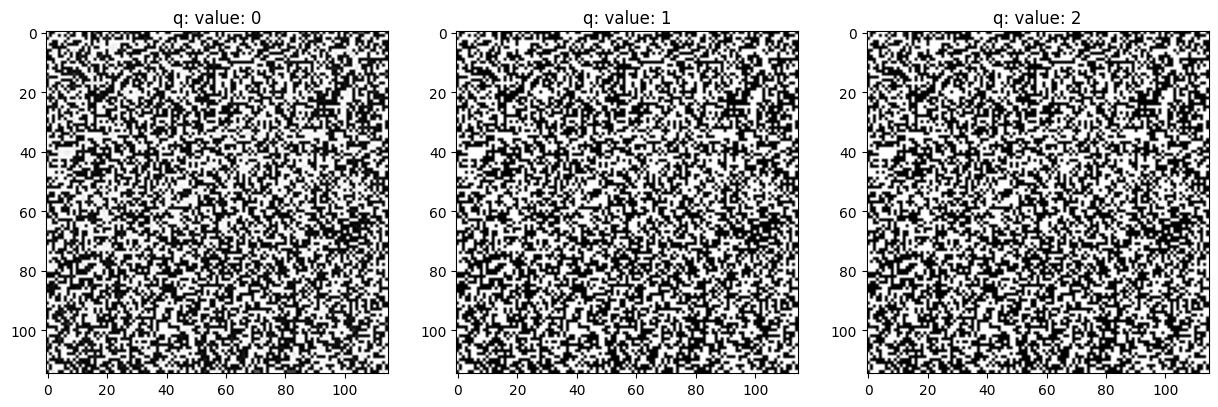

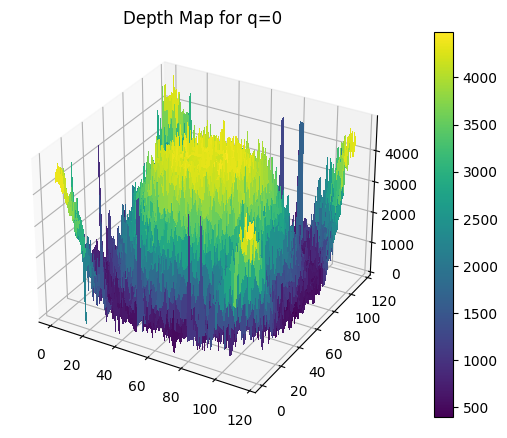

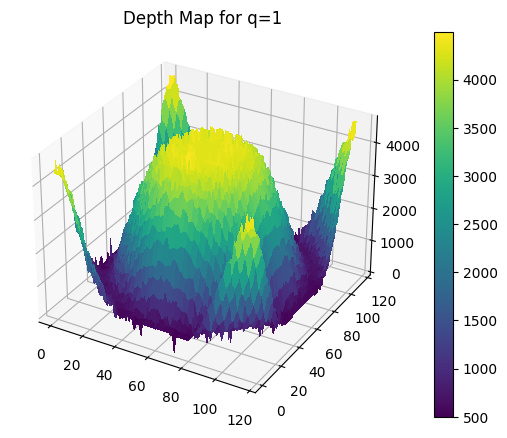

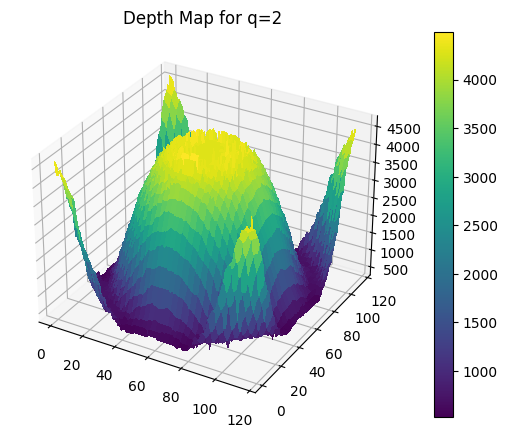

In [3]:
import numpy as np
import cv2
from scipy.io import loadmat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load stack.mat file
mat1 = loadmat('stack.mat')
N = int(mat1['numframes']) 
frames = {}

# Store the images in a dictionary for easier access later
for key in mat1.keys():
   if key[:5] == 'frame':
       frames[int(key[5:])] = mat1[key]

d = 50.50
q_values = [0, 1, 2]
lx = np.array([[0,  0, 0],[1, -2, 1],[0,  0, 0]])
ly = np.array([[0,  1, 0],[0, -2, 0],[0,  1, 0]])

def conv(img, kernel):
   width, height = img.shape
   k_size = len(kernel)
   t = k_size // 2 
   filtered_image = np.zeros((width - 2 * t, height - 2 * t))
   for i in range(t, width - t):
       for j in range(t, height - t):
           patch = img[i - t:i + t + 1, j - t:j + t + 1]
           filtered_image[i - t, j - t] = np.sum(patch * kernel)
   return filtered_image

fig = plt.figure(figsize=(15, 10))
axes = []
depths = {}
Maxs = {}
qs = {}

for l, q in enumerate(q_values):
   width, height = frames[1].shape
   stacked = np.zeros((width, height, N))

   for i in range(N):
       img = frames[i + 1]
       k = 2 * q + 1
       kernel = np.ones((k, k))
       p = q + 1
       img_padded = np.zeros((width + 2 * p, height + 2 * p))
       img_padded[p:-p, p:-p] = img

       I_xx = conv(img_padded, lx)
       I_yy = conv(img_padded, ly)
       ML = np.abs(I_xx) + np.abs(I_yy)
       SML = conv(ML, kernel)
       stacked[:, :, i] = SML

   max_sharpness_frames = np.argmax(stacked, axis=2)

   depth = max_sharpness_frames * d
   depths[l] = depth
   Maxs[l] = max_sharpness_frames
   sharp_img = np.zeros((width, height))

   for i in range(width):
       for j in range(height):
           frame = max_sharpness_frames[i, j] + 1
           sharp_img[i, j] = frames[frame][i, j]

   qs[l] = sharp_img
   axes.append(fig.add_subplot(1, 3, l + 1))
   subplot_title = ("q: value: " + str(q))
   axes[-1].set_title(subplot_title)
   plt.imshow(sharp_img, 'gray')

plt.show()


for l, q in enumerate(q_values):
   width, height = frames[1].shape
   X, Y = np.meshgrid(np.arange(height) + 1, np.arange(width) + 1)
   fig = plt.figure(figsize=(10, 5))
   ax = fig.add_subplot(111, projection='3d')
   surf = ax.plot_surface(X, Y, depths[l], cmap='viridis', linewidth=0, antialiased=False)  # Set the colormap to 'viridis'

   title = rf"Depth Map for q={q}"
   plt.title(title)
   fig.colorbar(surf)
   plt.show()

